# perceptron 
In machine learning,
the perceptron is an algorithm for supervised learning of binary classifiers.
A binary classifier is a function which can decide whether or not an input, 
represented by a vector of numbers, belongs to some specific class.
It is a type of linear classifier, 
i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

# Defining and plotting our dataset¶


In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])


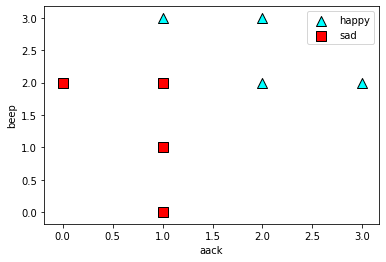

In [4]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

# Coding the perceptron trick

In [6]:
def step(x):
    if x >= 0:
        output= 1
    else:
        output= 0
    return output

def score(weights, bias, features):
    output= features.dot(weights) + bias
    return output

def prediction(weights, bias, features):
    output= step(score(weights, bias, features))
    return output

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        output= 0
    else:
        output= np.abs(score(weights, bias, features))
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [7]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

# Running the perceptron algorithm

In [8]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

C:\Users\sawsan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


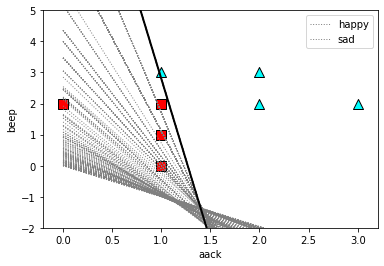

([0.5199999999999996, 0.049999999999999364], -0.6600000000000004)

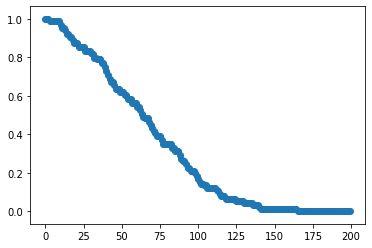

In [9]:
perceptron_algorithm(features, labels)


# The perceptron algorithm using SKlearn¶


In [10]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(features, labels)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
clf.score(features, labels)


1.0

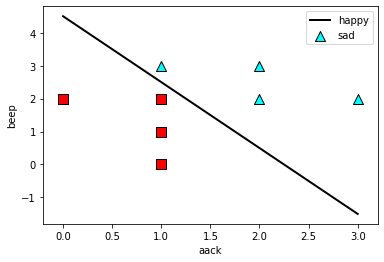

In [12]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()